In [98]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
#%matplotlib notebook
%matplotlib inline

import csv
from collections import defaultdict
import re

In [58]:
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

### Useful Functions for Data Standardization

In [59]:
def clean_cols(df):
    for col in df.columns:
        # Clean the string type data
        if df[col].dtype == 'object':
            df[col]= df[col].str.strip()
    return df

def make_standard_names(df):
    # Clean up the column names
    cols = df.columns
    for col in cols:
        col_new = col
        col_new = col_new.lower()
        col_new = col_new.strip()
        col_new = col_new.replace('/','')
        col_new = col_new.replace(' ','_')
        df = df.rename(columns = {col: col_new})
    return df

### NYC Transit Subway Entrance And Exit Data


In [60]:
# This data file provides a variety of information on subway station entrances and exits which includes but is not limited to: 
# Division, Line, Station Name, Longitude and Latitude coordinates of entrances/exits.
nyc_entr_exit = pd.read_csv("https://data.ny.gov/api/views/i9wp-a4ja/rows.csv")

In [61]:
print(nyc_entr_exit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 32 columns):
Division              1868 non-null object
Line                  1868 non-null object
Station Name          1868 non-null object
Station Latitude      1868 non-null float64
Station Longitude     1868 non-null float64
Route1                1868 non-null object
Route2                1020 non-null object
Route3                494 non-null object
Route4                321 non-null object
Route5                238 non-null object
Route6                127 non-null object
Route7                80 non-null object
Route8                48 non-null float64
Route9                28 non-null float64
Route10               23 non-null float64
Route11               23 non-null float64
Entrance Type         1868 non-null object
Entry                 1868 non-null object
Exit Only             56 non-null object
Vending               1868 non-null object
Staffing              1868 non-null object


In [62]:
nyc_entr_exit.sample(5)

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,Route6,Route7,Route8,Route9,Route10,Route11,Entrance Type,Entry,Exit Only,Vending,Staffing,Staff Hours,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
1165,IND,Fulton,Kingston-Throop,40.680,-73.941,A,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,False,Throop Ave,Fulton St,NE,40.680,-73.940,"(40.679921, -73.940858)","(40.680010, -73.940247)"
355,IND,8 Avenue,Inwood - 207th St,40.868,-73.920,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,True,NaN,True,Broadway,207th St,SW,40.868,-73.921,"(40.868072, -73.919899)","(40.867653, -73.920949)"
608,BMT,Broadway Jamaica,Van Siclen Av,40.678,-73.892,J,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,Van Siclen Ave,Fulton St,SW,40.678,-73.892,"(40.678024, -73.891688)","(40.677847, -73.891711)"
137,IND,6 Avenue,Bergen St,40.686,-73.991,F,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,False,Smith St,Bergen St,NE,40.687,-73.990,"(40.686145, -73.990862)","(40.686727, -73.990269)"
804,BMT,Canarsie,Bedford Av,40.717,-73.957,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,Bedford Ave,N 7th St,SE,40.718,-73.958,"(40.717304, -73.956872)","(40.717714, -73.957695)"


### Turnstile Usage Data 2017

In [69]:
### Turnstile Usage Data: 2017
# State of New York — Data file contains information on entry/exit register values for individual control areas.
nyc_turnstile_2017 = pd.read_csv('turnstile_data/turnstile_170617.txt')
#nyc_turnstile_2017 = pd.read_csv("https://data.ny.gov/api/views/v5y5-mwpb/rows.csv")
#nyc_turnstile_2017 = pd.read_csv('turnstile_data/Turnstile_Usage_Data__2017.csv')


In [70]:
#nyc_turnstile_2017 = nyc_turnstile_2017.iloc[0:round(np.shape(nyc_turnstile_2017)[0])]

In [75]:
nyc_turnstile_2017 = clean_cols(nyc_turnstile_2017)
nyc_turnstile_2017 = make_standard_names(nyc_turnstile_2017)

nyc_turnstile_2017['readtime'] = nyc_turnstile_2017['date'] + ' ' + nyc_turnstile_2017['time']
nyc_turnstile_2017['readtime'] = pd.to_datetime(nyc_turnstile_2017['readtime'], format='%m/%d/%Y %H:%M:%S')

nyc_turnstile_2017['id'] = nyc_turnstile_2017['ca']+'_'+nyc_turnstile_2017['unit']+'_'+nyc_turnstile_2017['scp']

In [83]:
nyc_turnstile_2017_grouped = nyc_turnstile_2017.set_index(['id','readtime'])

# Calculate entries and exists per period
nyc_turnstile_2017_grouped['entries_diff'] = nyc_turnstile_2017_grouped['entries'].diff()
nyc_turnstile_2017_grouped['exits_diff'] = nyc_turnstile_2017_grouped['exits'].diff()

ca                    A002
unit                  R051
scp               02-00-00
station              59 ST
linename           NQR456W
division               BMT
date            06/10/2017
time              00:00:00
desc               REGULAR
entries            6215258
exits              2104297
entries_diff           NaN
exits_diff             NaN
Name: (A002_R051_02-00-00, 2017-06-10 00:00:00), dtype: object

In [49]:
meter_df = nyc_turnstile_2017[['ca','unit','scp','station']]
meter_df = meter_list.drop_duplicates()


len(meter_df)
meter_df

,ca,unit,scp,station
0,A002,R051,02-00-00,59 ST
42,A002,R051,02-00-01,59 ST
84,A002,R051,02-03-00,59 ST
126,A002,R051,02-03-01,59 ST
168,A002,R051,02-03-02,59 ST
210,A002,R051,02-03-03,59 ST
252,A002,R051,02-03-04,59 ST
294,A002,R051,02-03-05,59 ST
336,A002,R051,02-03-06,59 ST
378,A002,R051,02-05-00,59 ST


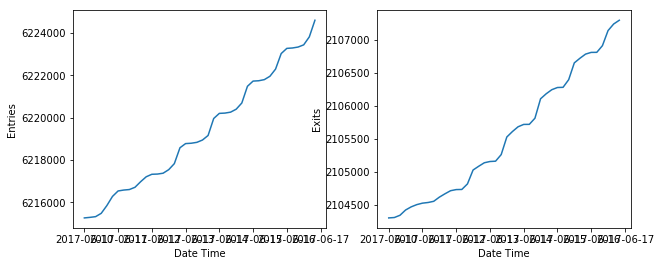

In [100]:
first_turn = nyc_turnstile_2017_grouped.loc[
    nyc_turnstile_2017_grouped.index.get_level_values('id') == 'A002_R051_02-00-00']

fig,ax = plt.subplots(1,2,figsize=(10,4))

ax[0].plot(first_turn.index.get_level_values('readtime'),first_turn.entries)
ax[0].set_xlabel('Date Time')
ax[0].set_ylabel('Entries')

ax[1].plot(first_turn.index.get_level_values('readtime'),first_turn.exits)
ax[1].set_xlabel('Date Time')
ax[1].set_ylabel('Exits')


In [45]:
scp_df = nyc_turnstile_2017['scp'].drop_duplicates()
len(scp_df)

230

In [48]:
scp_station_df = nyc_turnstile_2017[['scp','station']]
scp_station_df = scp_station_df.drop_duplicates()
len(scp_station_df)


4149

In [55]:
#Make hierarchical index
three_col = nyc_turnstile_2017[['ca','unit','scp']].drop_duplicates()
len(three_col)

4695

In [12]:
# Calculate entries and exists per period
nyc_turnstile_2017['entries_diff'] = nyc_turnstile_2017['entries'].diff()
nyc_turnstile_2017['exits_diff'] = nyc_turnstile_2017['exits'].diff()

nyc_turnstile_2017[nyc_turnstile_2017['entries_diff'] < 0] = np.nan
nyc_turnstile_2017[nyc_turnstile_2017['exits_diff'] < 0] = np.nan
nyc_turnstile_2017[nyc_turnstile_2017['entries_diff'] > 10**5] = np.nan
nyc_turnstile_2017[nyc_turnstile_2017['exits_diff'] > 10**5] = np.nan

In [50]:
# Make a Datetime Column
nyc_turnstile_2017['dtime'] = nyc_turnstile_2017['date'] + ' ' + nyc_turnstile_2017['time']
nyc_turnstile_2017['dtime'] = pd.to_datetime(nyc_turnstile_2017['dtime'], format='%m/%d/%Y %H:%M:%S')

In [51]:
nyc_turnstile_2017

,ca,unit,scp,station,linename,division,date,time,desc,entries,exits,dtime
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,00:00:00,REGULAR,6215258,2104297,2017-06-10 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,04:00:00,REGULAR,6215284,2104303,2017-06-10 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,08:00:00,REGULAR,6215318,2104337,2017-06-10 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,12:00:00,REGULAR,6215475,2104417,2017-06-10 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,16:00:00,REGULAR,6215841,2104465,2017-06-10 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,20:00:00,REGULAR,6216274,2104499,2017-06-10 20:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2017,00:00:00,REGULAR,6216533,2104521,2017-06-11 00:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2017,04:00:00,REGULAR,6216576,2104531,2017-06-11 04:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2017,08:00:00,REGULAR,6216600,2104549,2017-06-11 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/11/2017,12:00:00,REGULAR,6216706,2104612,2017-06-11 12:00:00


In [14]:
# plot one sample timeseries
single_station = nyc_turnstile_2017[nyc_turnstile_2017.station == '59 ST']


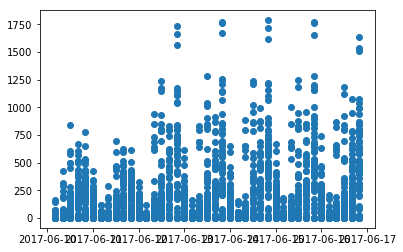

In [15]:
plt.plot(single_station['dtime'],single_station['entries_diff'],marker = 'o',linestyle='None')

In [16]:
set(nyc_turnstile_2017.station)

{nan,
 'CHRISTOPHER ST',
 'PENNSYLVANIA AV',
 'COURT SQ',
 'JAMAICA 179 ST',
 'NORWOOD AV',
 'EAST BROADWAY',
 '219 ST',
 'MOSHOLU PKWY',
 'E 180 ST',
 '57 ST-7 AV',
 '90 ST-ELMHURST',
 'LIBERTY AV',
 'BOTANIC GARDEN',
 'JFK JAMAICA CT1',
 'BEDFORD PK BLVD',
 'WAKEFIELD/241',
 'PRESIDENT ST',
 '42 ST-BRYANT PK',
 'CENTRAL PK N110',
 '21 ST',
 'AVENUE X',
 'SUTTER AV-RUTLD',
 'ALABAMA AV',
 '15 ST-PROSPECT',
 'PARKSIDE AV',
 'LEXINGTON AV/63',
 '68ST-HUNTER CO',
 '174-175 STS',
 'WINTHROP ST',
 '36 ST',
 'CYPRESS AV',
 '225 ST',
 'CORTLANDT ST',
 'BROOK AV',
 'V.CORTLANDT PK',
 'BLEECKER ST',
 '233 ST',
 'TREMONT AV',
 'BEVERLEY ROAD',
 '170 ST',
 'BROAD ST',
 'BOROUGH HALL',
 '46 ST',
 'JOURNAL SQUARE',
 'NEWARK C',
 'ASTORIA BLVD',
 '63 DR-REGO PARK',
 '80 ST',
 '34 ST-PENN STA',
 'AVENUE N',
 'PATH WTC 2',
 '51 ST',
 '18 AV',
 'HOYT ST',
 '2 AV',
 'PELHAM PKWY',
 'VAN SICLEN AV',
 '55 ST',
 'BRONX PARK EAST',
 'E 149 ST',
 'GREENPOINT AV',
 '5 AV/53 ST',
 '155 ST',
 'LONGWOOD AV',
 '

In [17]:
ls turnstile_data/

Turnstile_Usage_Data__2016.csv  turnstile_170617.txt
Turnstile_Usage_Data__2017.csv  turnstile_170624.txt
turnstile_170610.txt
